In [5]:
import xarray as xr
import os
import numpy as np
import matplotlib.animation as anim
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from palettable.lightbartlein.diverging import BlueDarkRed12_12

ds = xr.open_dataset(os.path.join('data', 'MERRA-2', 'Texas', 'merged-all-products-daily-averages-clipped.nc4'))
ds['PM2.5'] = ds['PM2.5'] * 1e9
ds

<xarray.Dataset>
Dimensions:      (lat: 22, lon: 21, time: 4018)
Coordinates:
  * lat          (lat) float64 26.0 26.5 27.0 27.5 28.0 ... 35.0 35.5 36.0 36.5
  * lon          (lon) float64 -106.2 -105.6 -105.0 ... -95.0 -94.38 -93.75
  * time         (time) datetime64[ns] 2010-01-01 2010-01-02 ... 2020-12-31
    spatial_ref  int64 ...
Data variables: (12/117)
    LWGAB        (time, lat, lon) float32 ...
    CLDTOT       (time, lat, lon) float32 ...
    ALBNIRDF     (time, lat, lon) float32 ...
    SWTDN        (time, lat, lon) float32 ...
    EMIS         (time, lat, lon) float32 ...
    LWTUPCLRCLN  (time, lat, lon) float32 ...
    ...           ...
    QV10M        (time, lat, lon) float32 ...
    HOURNORAIN   (time, lat, lon) float32 ...
    T2MMAX       (time, lat, lon) float32 ...
    T2MMEAN      (time, lat, lon) float32 ...
    T2MMIN       (time, lat, lon) float32 ...
    TPRECMAX     (time, lat, lon) float32 ...

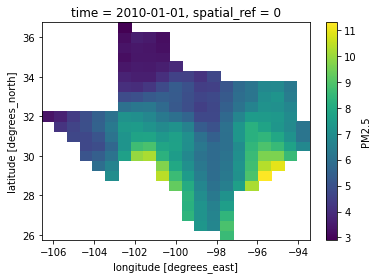

In [6]:
ds['PM2.5'][0].plot()

In [7]:
monthly_means = ds.resample(time='1M').mean()

In [8]:
monthly_means

<xarray.Dataset>
Dimensions:      (lat: 22, lon: 21, time: 132)
Coordinates:
  * time         (time) datetime64[ns] 2010-01-31 2010-02-28 ... 2020-12-31
  * lat          (lat) float64 26.0 26.5 27.0 27.5 28.0 ... 35.0 35.5 36.0 36.5
  * lon          (lon) float64 -106.2 -105.6 -105.0 ... -95.0 -94.38 -93.75
    spatial_ref  int64 0
Data variables: (12/117)
    LWGAB        (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    CLDTOT       (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    ALBNIRDF     (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    SWTDN        (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    EMIS         (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    LWTUPCLRCLN  (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    ...           ...
    QV10M        (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    HOURNORAIN   (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    T2MMAX       (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    T2MMEAN      (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    T2MMIN       (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    TPRECMAX     (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan

In [9]:
variable = monthly_means['PM2.5'].sel(time=slice('2010-01-01', '2020-12-31'))

In [13]:
%%capture

fig = plt.figure(dpi=300)
ax = plt.axes(projection=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.STATES)

image = variable.isel(time = 0).plot.imshow(ax=ax, transform=ccrs.PlateCarree(), animated=True, cmap=BlueDarkRed12_12.mpl_colormap);
ax.set_frame_on(False)

def update(t):
    ax.set_title(np.datetime_as_string(t, unit='D'))
    image.set_array(variable.sel(time=t))
        
    return image,

animation = anim.FuncAnimation(fig, update, frames=variable.time.values, blit=False);

In [15]:
animation.save('PM2.5-10fps.gif', writer='imagemagick', fps=10)

In [39]:
ds.close()